#   3 September 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Recall: Derivatives and Central-difference formulas
The first and second derivatives of a function $f(x)$ are denoted and given by

$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$

where $h$ is some arbitrary differential length. For finite sets of data, we have the the x-indexed, forward-difference version being
$$f^\prime(x_n) = \frac{f(x_{n+1}) - f(x_{n})}{\Delta x}$$

and the central-difference version of the second derivative of the function
$$f^{\prime\prime}(x_n) = \frac{f(x_{n+1})-2f(x_n)+f(x_{n-1})}{(\Delta x)^2}$$

##  Problem 3.8
(a continuation of Problem 2.8)

We study the following function $f(x)$ and its second derivative. We take $x = 0.004$.

$$f(x)=\frac{1-cos(x)}{x^2}$$

- [X] Start by analytically evaluating the second derivative, and plugging in $x$.
- [X] Give $h$ the values $10^{-1}, 10^{-2}, \dots, 10^{-6}$ and 
    - [X] produce a log-log plot of the absolute error in the first central-difference approximation to the second derivative.
- [X] Introduce a new set of points to the previous plot, this time evaluating the **first central-difference approximation** to the *second derivative of the analytically rewritten version of $f(x)$*, which we got in `Problem 2.8` as $g(x)$:

$$g(x) = 2\frac{\sin^2\left(\frac{1}{2}x\right)}{x^2}$$

We first solve the derivatives of $f(x)$ by hand:

$$f^\prime(x) = \frac{-2+2\cos(x)+x\sin(x)}{x^3}$$
$$f^{\prime\prime}(x) = \frac{6 + \left(x^2+6\right)\cos(x) -4\sin(x)}{x^4}$$

and the derivatives of $g(x)$ by hand:

In [2]:
def func(xVar=1):
    return (1-np.cos(xVar))/(xVar**2)

def func_pp(x=1):
    return x**-4 * (6 + (x**2-6)*np.cos(x) - 4*x*np.sin(x))

x_g = 4E-3

print(f'x = {x_g}, then f   = {func(x_g)}')
print(f'x = {x_g}, then f\'\' = {func_pp(x_g)}')

x = 0.004, then f   = 0.49999933333239044
x = 0.004, then f'' = -0.08333437259212036


We are then to implement the second derivative based on its central-limit formula:

$$f^{\prime\prime}(x) = \frac{f(x_{n+1}) -2f(x_{n}) +f(x_{n-1})}{h^2}$$

which we define in the code as `cent_diff_2()`.

In [3]:
def x_gen(start = 0, end = 1, deltaX = 1E-1):
    return np.arange(start, end+deltaX, step = deltaX)

#   Takes second derivative at a certain point x.
def cent_diff_2(f, xVar, dxVar):
    return (f(xVar-dxVar) - 2*f(xVar) + f(xVar+dxVar))/dxVar**2

'''
def cent_diff_2x(f, xArr, dxVar):
    numerator = f(x)
    return num / dxVar**2
x = np.linspace(0.1, 10, num=100)
'''

length = 6                                          #   Sets the length of the h-array and the resulting derivatives array z.
h_arr = [10**-i for i in range(1, length+1)]        #   elements are 10E-i
z_diff = np.zeros(length)                                #   y is the output array for graphing
z = np.zeros(length)
for i in range(len(h_arr)):
    z[i] = cent_diff_2(func_pp, x_g, h_arr[i])
    z_diff[i] = np.abs(func_pp(x_g) - z[i])

We then also take the central-difference second derivative of our alternative function $g(x)$, as well as its error from the absolute value.
$$g(x) = 2\frac{\sin^2\left(\frac{1}{2}x\right)}{x^2}$$

In [4]:
#   Defining g(x).
def g(xVar=1):
    return 2*(np.sin(0.5*xVar)**2)/(xVar**2)

g_pp = [cent_diff_2(g, x_g, h_arr[i]) for i in range(0,len(h_arr))]     #   Array of g''(x) for every specified h
g_ppdiff = [np.abs(func_pp(x_g) - i) for i in g_pp]                     #   Array of their absolute difference with actual.

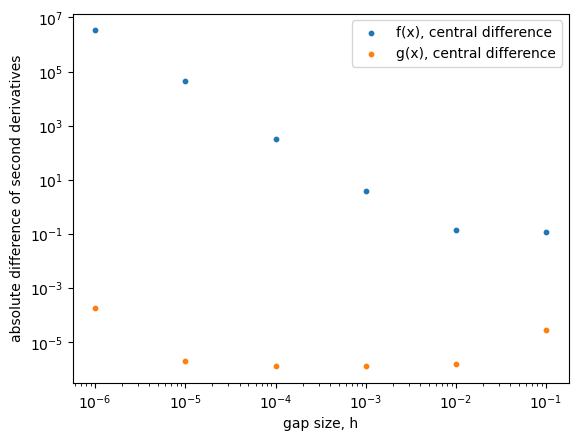

In [5]:
fig, ax = plt.subplots()
plt.scatter(h_arr, z_diff, s=10, label="f(x), central difference")
plt.scatter(h_arr, g_ppdiff, s=10, label="g(x), central difference")
ax.set_xlabel('gap size, h')
ax.set_ylabel('absolute difference of second derivatives')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In the gap size range specified by the x-axis above, we notice that the error of $g^{\prime\prime}(x)$ in every size of $h$, with respect to the actual value of $f^{\prime\prime}(x)$, is consistently lower than the error of the central-difference value of $f^{\prime\prime}(x)$.

Even within this small range, we already see that the error **does not** consistenly go down, and is much evident in the $g^{\prime\prime}(x)$ error. This is in line with what we have learned in class that there is a sweet spot/region where the error is minimal, until it is again adversely affected by the $\frac{1}{h}$- and $h$-proportional error factors. <br><br>

##  Problem 3.25

Examine the derivative of a *noisy function*, such as $f(x)$ below:
$$f(x)= 2+5\sin(x)+0.1\sin(30x)$$
where the last term has a small amplitude yet has a dramatic effect on the derivatives.

- [X] Take 128 points placed on an equally spaced grid, from $0$ to $2\pi$ and produce a table of values $(x_i, f(x_i))$.
- [X] Plot $f(x)$ together with $g(x)$ where $g(x)$ does not contain the third term.
- [X] Create a plot that contains:
    - [X] the analytically computed $f^\prime(x)$
    - [X] the analytically computed $g^\prime(x)$
    - [X] the forward-difference approximation to $f^\prime(x)$ using adjacent points on the grid.
- [X] Introduce a new set of points into the latest plot:
    - [X] the forward-difference approximation to $f^\prime(x)$, using grid points which are twice removed
- [ ] Compare the analytical $f^\prime(x)$ and $g^\prime(x)$ and numerically solved $f^\prime(x)$ with varying $h$.
    - [ ] deduce and explain how the choice of $h$ affects the simulated noise in the function $f(x)$

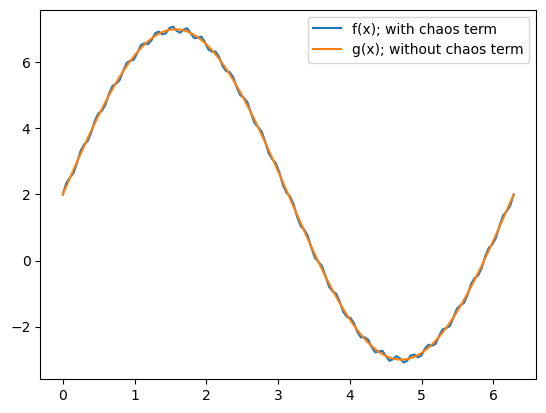

In [6]:
#   Initialization of array of x values.
start = 0
end = 2*np.pi
N = 128

def f(xVar):
    return 2 + 5*np.sin(xVar) + 0.1*np.sin(30*xVar)
def g(xVar):
    return 2 + 5*np.sin(xVar)

x = np.linspace(start, end, N)
y_f = [f(i) for i in x]
y_g = [g(i) for i in x]

fig3, ax3 = plt.subplots()
plt.plot(x, y_f, label="f(x); with chaos term")
plt.plot(x, y_g, label="g(x); without chaos term")
ax3.legend()
plt.show()

The third term of $f(x)$ has a noticeable noise effect on the function, in which its frequency (say, oscillations per unit) is directly proportional to the coefficent inside the sinusoid's input parameter; in this case, $2\pi f_{noise} = 30$.

We then note here the first two derivatives of $f^\prime(x)$ and $g^\prime(x)$:

$$f^\prime(x)= 5\cos(x)+3\cos(30x)$$
$$f^{\prime\prime}(x) = -5\sin(x)-90\sin(30x)$$
$$g^\prime(x)= 5\cos(x)$$
$$g^{\prime\prime}(x) = -5\sin(x)$$

where we notice that the derivatives of $f(x)$ still have the noise factor, and actually increases in amplitude as the degree increases. 

Now, let us define the first derivatives analytically, and numerically via the forward-difference formula.

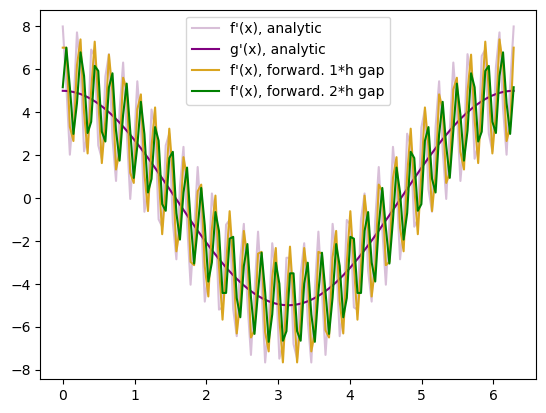

In [72]:
def f_p(xVar = 0):
    return 5*np.cos(xVar) + 3*np.cos(30*xVar)
def g_p(xVar = 0):
    return 5*np.cos(xVar)
def forw_diff_1(fVar, xVar, hVar):
    return (fVar(xVar) - fVar(xVar-hVar)) / (hVar)
def forw_diff_1_nGap(fVar, xVar, hVar, nGap):
    return (fVar(xVar) - fVar(xVar-nGap*hVar)) / (nGap*hVar)

''' was trying to implement roll() below heheh
def cent_diff_1_roll(fVar, index, xArr):
    x_roll = np.roll(xArr, index+2)
    return (fVar(xVar-2*hVar)) / 2*hVar
    pass
'''
n = 2
fp_analytic = [f_p(i) for i in x]
gp_analytic = [g_p(i) for i in x]
fp_forward = [forw_diff_1(f, i, x[1]-x[0]) for i in x]
fp_forward_2gap = [forw_diff_1_nGap(f, i, x[1]-x[0], n) for i in x]

fig4, ax4 = plt.subplots()
plt.plot(x, fp_analytic, label='f\'(x), analytic', color='thistle')
plt.plot(x, gp_analytic, label='g\'(x), analytic', color='purple')
plt.plot(x, fp_forward, label='f\'(x), forward. 1*h gap', color='goldenrod') 
plt.plot(x, fp_forward_2gap, label=f'f\'(x), forward. 2*h gap', color="green")
ax4.legend()
plt.show()

Note that with the arbitrary $N=128$ resolution, the unit gap size is $h = \frac{2\pi-0}{N} = \frac{1}{64}\pi$. With the same forward-difference formula, we notice that an increase in the gap size between the points used in the formula results in a smaller amplitude of the "chaos" term. 

Upon analytic review, this effect stems from the chaos term in the derivatives of $f(x)$, $3\cos(30x)$, which is maximal in amplitude compared to $A=0.1$ on the original function. We also witness the derivative of $g(x)$ is entirely smooth due to the chaos term's absence.

The gap size $h$, in particular, has the effect of decreasing the amplitude of the noise as $h$ increases. However, it also introduces a phase shift since the original function is an addition of two sinusoids with different frequencies.

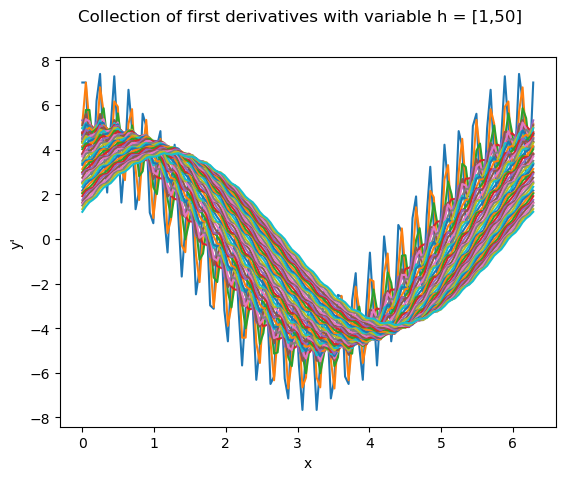

In [83]:
M = 50  #   arbitrary limit of graph below.
fig7, ax7 = plt.subplots()
ax7.set_ylabel('y\'')
ax7.set_xlabel('x')
plt.suptitle(f'Collection of first derivatives with variable h = [1,{M}]')
for j in range(1, M+1, 1):
    plt.plot(x, [forw_diff_1_nGap(f, i, x[1]-x[0], j) for i in x])
    pass
plt.show()

### Experimental

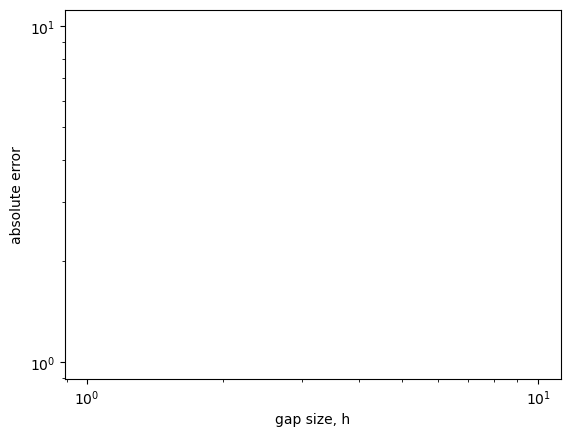

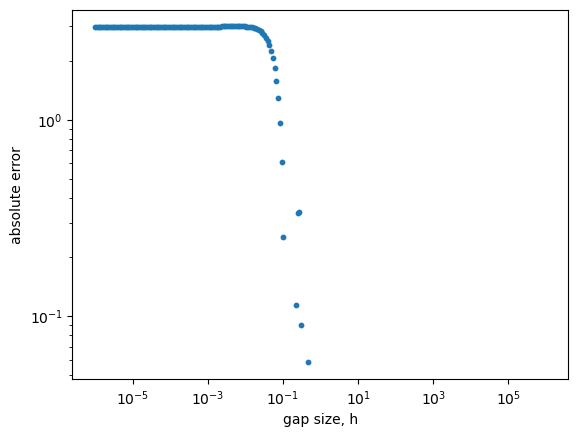

In [46]:
#   test lang
err = np.ones(2)
fig6, ax6 = plt.subplots()
ax6.set_xscale('log')
ax6.set_yscale('log')
ax6.set_ylabel('absolute error')
ax6.set_xlabel('gap size, h')
while (err[0]>err[1]):
    plt.plot(x, [forw_diff_1_nGap(f, i, x[1]-x[0], n) for i in x])
    err[0], err[1] = err[1], 
    

h = [(10**((i*-6)/N)) for i in range(-N, N+1)]
fp_nGap_err = [(forw_diff_1_nGap(f, x_g, i, 1)-g_p(x_g)) for i in h]

fig5, ax5 = plt.subplots()
plt.scatter(h, fp_nGap_err, s=10)
ax5.set_xscale('log')
ax5.set_yscale('log')
ax5.set_ylabel('absolute error')
ax5.set_xlabel('gap size, h')
plt.show()

In [54]:
h = [(1/10**()) for i in np.arange(-length, length)]#for i in np.arange(-length, length)]

TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'tuple'